# Cardio Good Fitness Project:

## Objective:

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

1) Come up with a customer profile (characteristics of a customer) of the different products
2) Perform univariate and multivariate analyses
3) Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data Dictionary

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### Import the Necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
import warnings
!pip install colorama
from colorama import Style, Fore, Back
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Load the Dataset

In [2]:
cardio = pd.read_csv("CardioGoodFitness.csv")

### Check the Shape of the Dataset

In [3]:
cardio.shape

(180, 9)

In this dataset, there is contained
* 180 rows
* 9 columns of data

### Check the first few rows of this Dataset to confirm that it aligns with the initial description

In [4]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### Check the datatype of the variables to make sure that the data is read in properly

In [5]:
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Observations: 
1. Product, Gender and MaritalStatus is object data type
2. All the other variables are int64

In [6]:
# Usage and Fitness variables are converted into categorial variables
cardio.Usage = cardio.Usage.astype('category')
cardio.Fitness = cardio.Fitness.astype('category')

### Missing values Analysis

In [7]:
# function to display UNIQUE examples of data in each field

def getDesc(df, thisFt, numExamples=5):
    x = list(set(list(df[thisFt])))
    if len(x)<numExamples:
        numExamples = len(x)
    x = list(np.random.choice(x, size=numExamples, replace=False))
    print('Examples in '+Style.BRIGHT+Back.CYAN+thisFt+Back.RESET+':'+Style.RESET_ALL, x, '\n')
    return None

# ======================================================================================

# function to display the number of missing values in each field

def getNumNan(df, thisFeature):
    ms = df[df[thisFeature] != df[thisFeature]].shape[0]
    print('Missing values in '+Style.BRIGHT+Back.CYAN+thisFeature+Back.RESET+Style.RESET_ALL+': {}'.format(ms))
    return None

In [8]:
for i in cardio.columns:
    getNumNan(cardio, i)
    getDesc(cardio, i)

Missing values in Product: 0
Examples in Product: ['TM195', 'TM498', 'TM798'] 

Missing values in Age: 0
Examples in Age: [26, 42, 33, 48, 25] 

Missing values in Gender: 0
Examples in Gender: ['Male', 'Female'] 

Missing values in Education: 0
Examples in Education: [13, 16, 21, 14, 12] 

Missing values in MaritalStatus: 0
Examples in MaritalStatus: ['Partnered', 'Single'] 

Missing values in Usage: 0
Examples in Usage: [6, 4, 3, 7, 2] 

Missing values in Fitness: 0
Examples in Fitness: [5, 3, 2, 1, 4] 

Missing values in Income: 0
Examples in Income: [49801, 95866, 52290, 37521, 53439] 

Missing values in Miles: 0
Examples in Miles: [140, 38, 180, 75, 103] 



Observation: 
1. The Dataset is complete without missing values.
2. There are just three Products to be analysed

### Analysis of the quantitative variables in the Dataset

In [9]:
# Statistical Description of the Dataset

cardio.describe()

,Age,Education,Income,Miles
count,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,53719.57778,103.19444
std,6.94350,1.61705,16506.68423,51.86360
min,18.00000,12.00000,29562.00000,21.00000
25%,24.00000,14.00000,44058.75000,66.00000
50%,26.00000,16.00000,50596.50000,94.00000
75%,33.00000,16.00000,58668.00000,114.75000
max,50.00000,21.00000,104581.00000,360.00000


Observations: 
1. There is a large variation in the income values due a high Standard Deviation
2. The mean of Income and Miles is close to the 75% Percentile indicating a right skew

## Univaiate Analysis of all features (Numerical and categorical)

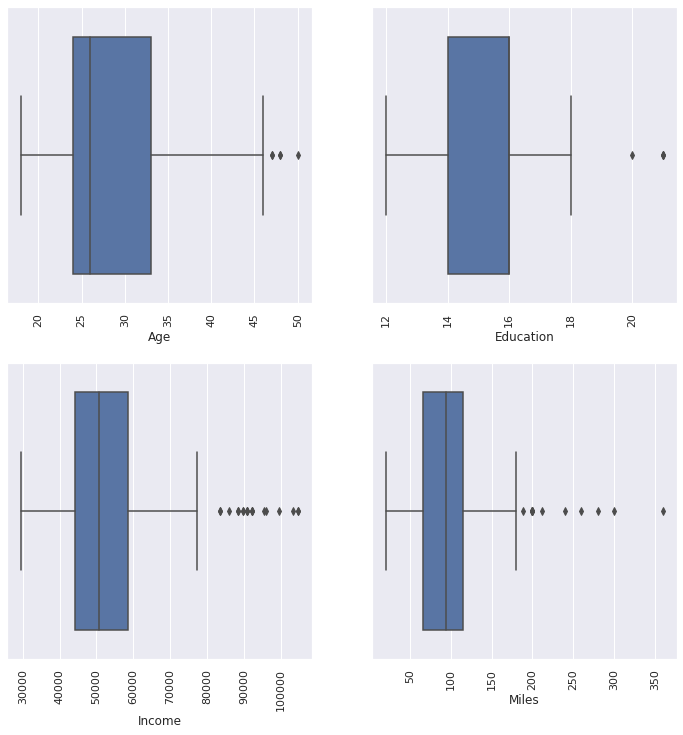

In [10]:
# Numerical variables Boxplot with Distribution

numcol = list(cardio.describe().columns)
colindex = np.arange(4) + 1

plt.figure(figsize=[12,12])

for i, j in zip(colindex, numcol):
  plt.subplot(2,2,i)
  plt.xticks(rotation=90)
  sns.boxplot(x = cardio[j])

Observations:
1. There are many outliers in income and Miles
2. The median for Education is at the same level with the 75th Percentile

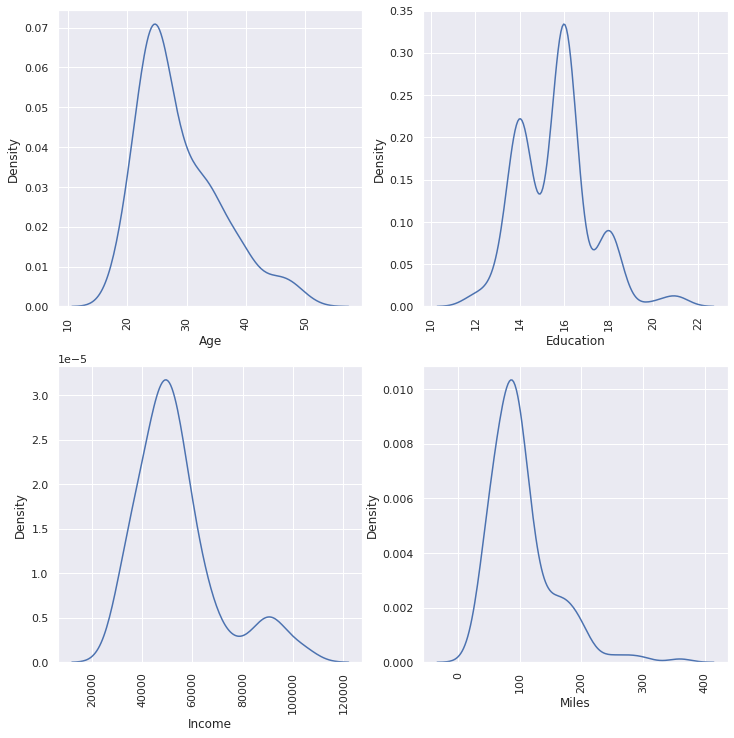

In [11]:
# Numerical variables Boxplot with Distribution

plt.figure(figsize=[12,12])

for i, j in zip(colindex, numcol):
  plt.subplot(2,2,i)
  plt.xticks(rotation=90)
  sns.kdeplot(x=cardio[j])

Observations:
1. Age is right skewed signifying that there were many young people
2. Income is right skewed signifying that the data is fociused more on people with low income
3. Miles is right skewed signified that more people are willing to run fewer miles.

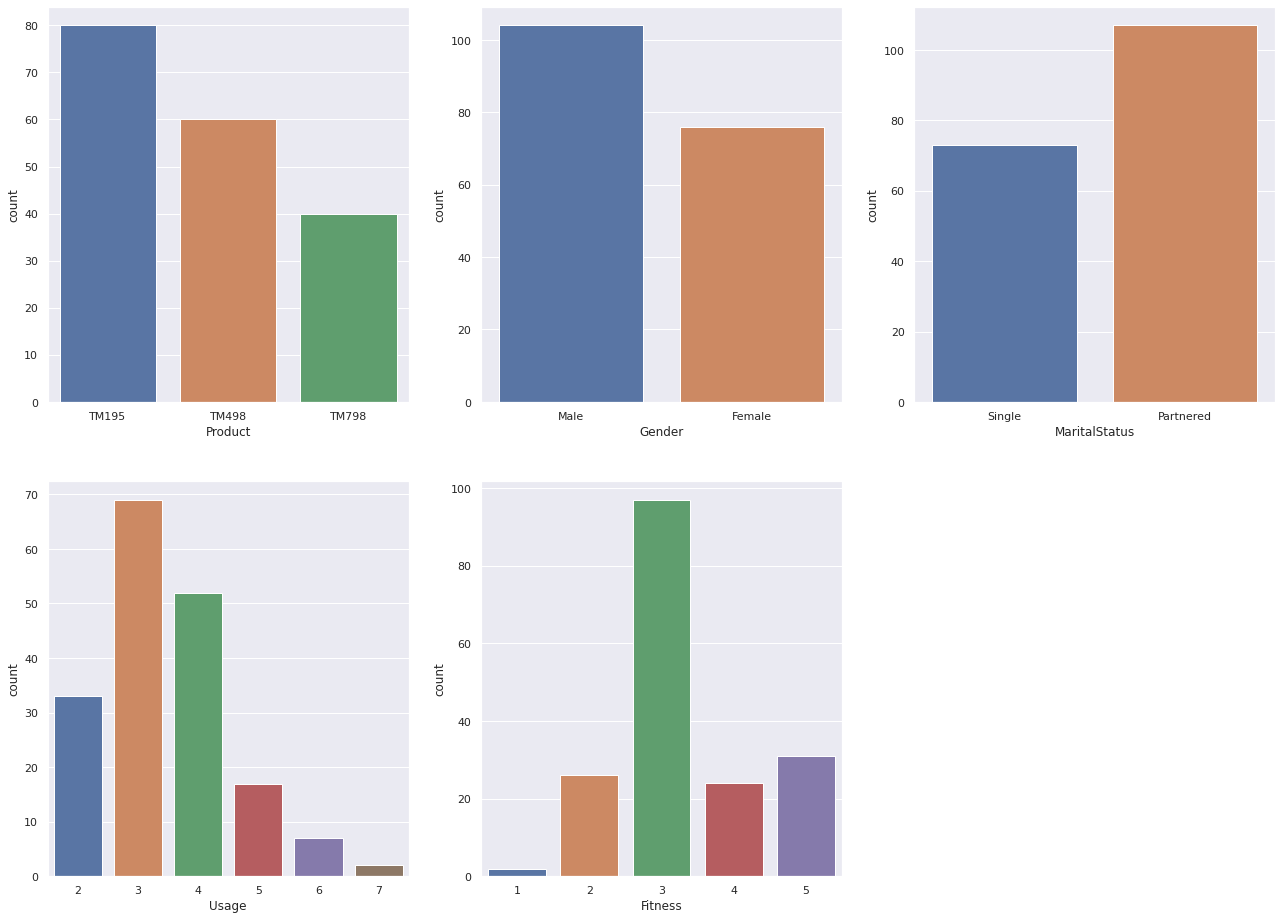

In [12]:
# Categorial variables Countplot

cardiodtypes = cardio.dtypes.reset_index()

catcol = cardiodtypes["index"][cardiodtypes[0] != "int64"]
catindex = np.arange(len(catcol)) + 1

plt.figure(figsize=[22,16])

for i, j in zip(catindex, catcol):
  plt.subplot(2,3,i)
 # plt.xticks(rotation=90)
  sns.countplot(x=cardio[j])

Observations:
1. Product TM195 was mostly used by people
2. Majority of the customers are males
3. The threadmill was used mostly thrice every week
4. Most of the customers have average fitness
5. Most of the customers have partners

## Multiple Variable Analysis

### Numerical Multiple Variable Analysis using correlation and pairplot

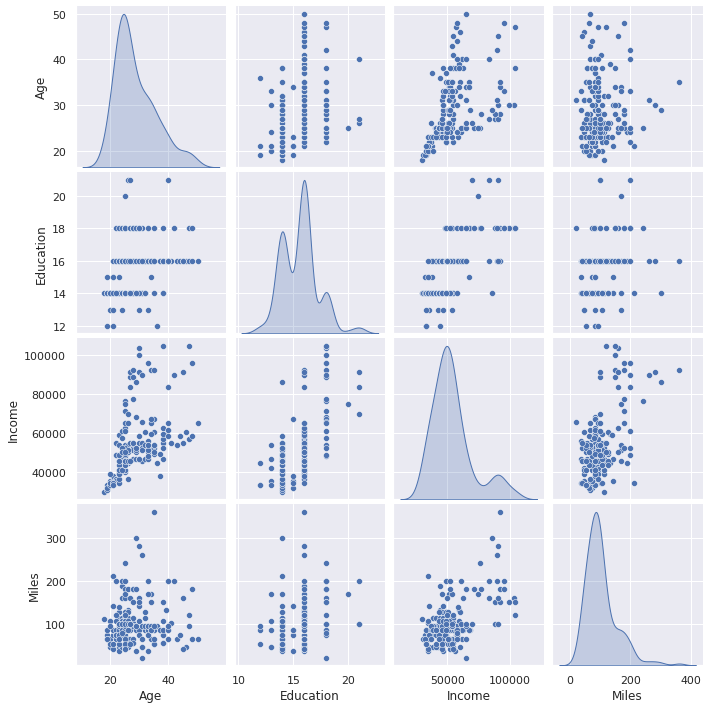

In [13]:
## Pair Plot

sns.pairplot(cardio, diag_kind="kde")

Observations:
* Majority of the Customers are young due to a right skew
* Majority of the Customers are low earning
* Majority of the customers plan to run lower miles

In [14]:
correlation = cardio.corr() # creating a 2-D Matrix with correlation plots
correlation

,Age,Education,Income,Miles
Age,1.00000,0.28050,0.51341,0.03662
Education,0.28050,1.00000,0.62583,0.30728
Income,0.51341,0.62583,1.00000,0.54347
Miles,0.03662,0.30728,0.54347,1.00000


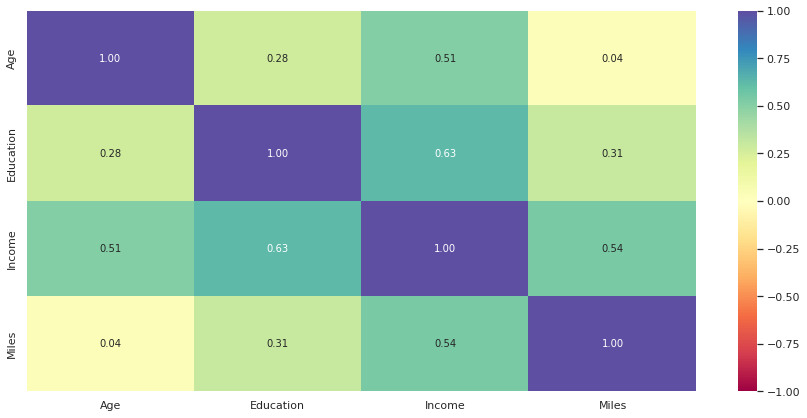

In [15]:
# Correlation Plot
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation:
* Age has a positive correlation with Income. This is expected as older people usually earn more than the younger ones
* Education also has a high correlation with Income. Meaning that more educated people earn more
* Correlation between income and number of miles is positive as expected. The services can easily be afforded by the rich. Therefore they go an hugher number of miles.

## Exploration of Categorical Features

### A deeper look at the Categories by the Product type to understand the variation

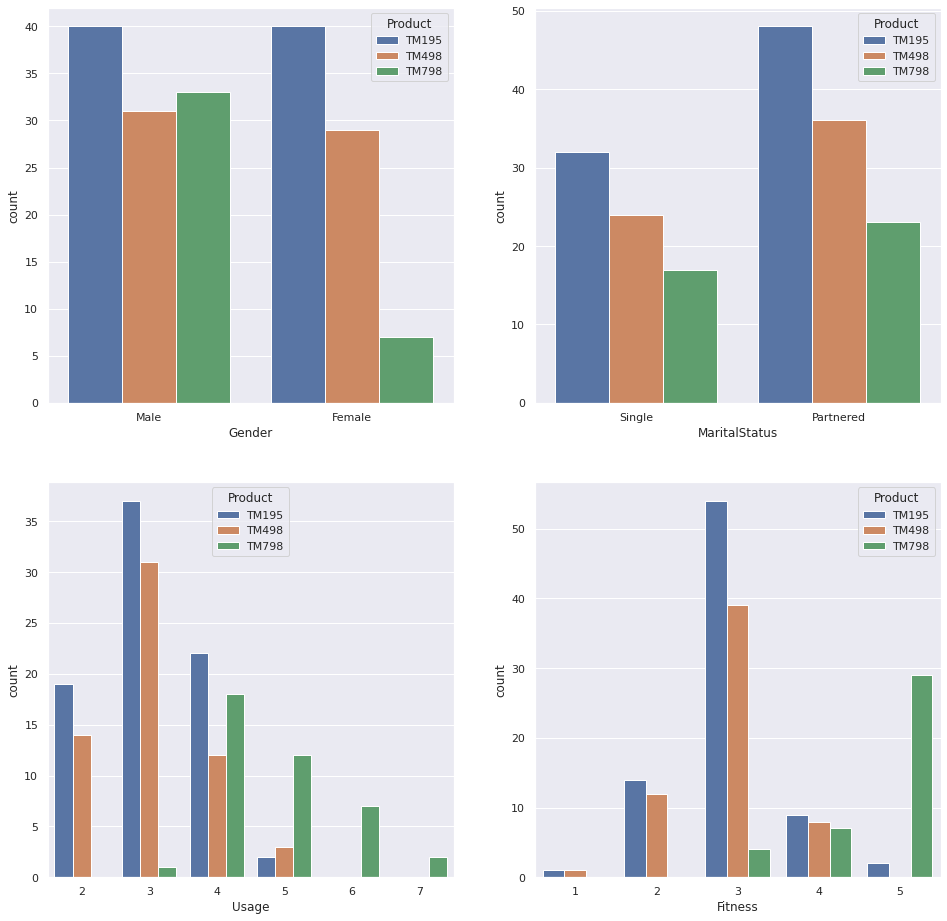

In [16]:
# Categorial variables Countplot

cardiodtypes = cardio.dtypes.reset_index()

catcol = cardiodtypes["index"][(cardiodtypes[0] != "int64") & (cardiodtypes["index"] != "Product")]
catindex = np.arange(len(catcol)) + 1

plt.figure(figsize=[16,16])

for i, j in zip(catindex, catcol):
  plt.subplot(2,2,i)
 # plt.xticks(rotation=90)
  sns.countplot(data = cardio, x=j, hue="Product")

Observations:

Overall, TM195 was the most preferred product, followed by TM498 and finally TM798
However, this trend was not maintained when other categorical variables were compared with Product.

* In Product, TM195 as expected was the most preferred for both genders.  However, the overall trend was satisfied by the females rather than the males. There was a significant difference in the preference of TM798. This signifies that TM798 is not attractive to the female gender.

* The marital status did not significantly affect the preference for the Products as it was similar to the overall trend.

* On the usage, The order for preference for products started to reverse as the usage increased. TM798 (Overall least preferred) is the most preferred form usage of 4. This means that TM798 is more preferred for long term engagement rather than short term engagement.
By relating this to gender, it can be inferred that females prefer long term engagement compared to shoter term engagements. This will be verified subsequently.

* On the fitness, the TM798 (Overall least preferred) was seen to gravitate towards a higher fitness. The Fitness variable needs to be furher investigated

## Categorical Plots to understand relationships

## Bivariate analysis to better understand relationships

### Grouping of the Ages into the groups

* Less than 15 -> Children
* 15 - 24 -> Youths
* 25 - 40 -> Young Adults
* 41 - 64 -> Old Adults
* More than 65 -> Seniors

In [17]:
# Function that will categorise the age into groups

def agegroup(data):
  if data < 15:
    s = 'Children [0 - 14]'
  elif (data > 15) & (data <= 24):
    s = 'Youths [15 - 24]'
  elif (data > 25) & (data <= 40):
    s = 'Young Adults [25 - 40]'
  elif (data > 41) & (data <= 64):
    s = 'Old Adults [41 - 64]'
  else:
    s = "Seniors [>65]"
  return s


# Age sort order
def agesort(data):
  if data < 15:
    s = 1
  elif (data > 15) & (data <= 24):
    s = 2
  elif (data > 25) & (data <= 40):
    s = 3
  elif (data > 41) & (data <= 64):
    s = 4
  else:
    s = 5
  return s


A function to categorize age into Age group suitable for further analysis has been created

In [18]:
# Categorize into Age Groups
cardio['Agegroup'] = cardio.Age.apply(agegroup)

# Categorize into Age Sort index
cardio['Agesort'] = cardio.Age.apply(agesort)

In [19]:
# Cardio Head view
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Agegroup,Agesort
0,TM195,18,Male,14,Single,3,4,29562,112,Youths [15 - 24],2
1,TM195,19,Male,15,Single,2,3,31836,75,Youths [15 - 24],2
2,TM195,19,Female,14,Partnered,4,3,30699,66,Youths [15 - 24],2
3,TM195,19,Male,12,Single,3,3,32973,85,Youths [15 - 24],2
4,TM195,20,Male,13,Partnered,4,2,35247,47,Youths [15 - 24],2


### Value counts to understand the distribution of the customers

In [20]:
cardio.Agegroup.value_counts()

Young Adults [25 - 40]    89
Youths [15 - 24]          54
Seniors [>65]             26
Old Adults [41 - 64]      11
Name: Agegroup, dtype: int64

Observation:
* The products are mostly patronised by the Young Adults which is expected. People in the Mid Age of life are the most concerned about their fitness. Also, the have the financial capacity to afford a good fitness program
* As expected, there is no record of children patronising the store striking out possibilities of underage transactions
* Unsurprisinly, seniors have made more purchases than the Old Adults. This is because seniors are retirees who have seen through a long career. However, the Old Adults are in the peak of their Careers with key family responsibilities and thus have a low preference for purchasing the products

## Further Specific Bivarivate Analysis

### Understanding of the Demographics of the Customers by Gender and Age Goup

In [21]:
cardio[['Agegroup', 'Agesort']].sort_values(by = 'Agesort').Agegroup.unique()

array(['Youths [15 - 24]', 'Young Adults [25 - 40]',
       'Old Adults [41 - 64]', 'Seniors [>65]'], dtype=object)

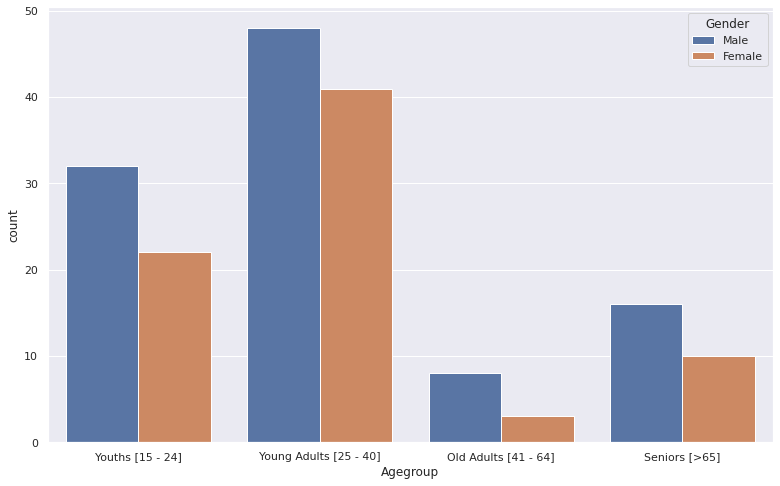

In [22]:
plt.figure(figsize=[13,8])

# Count plot for the Age Group vs Gender
sns.countplot(data = cardio, x='Agegroup', 
              order = cardio[['Agegroup', 'Agesort']].sort_values(by = 'Agesort').Agegroup.unique(),  
              hue="Gender")

Observation: The Age Group distribution of Gender did not affect the overall distribution of Gender

### Variation of Age Group with the Product

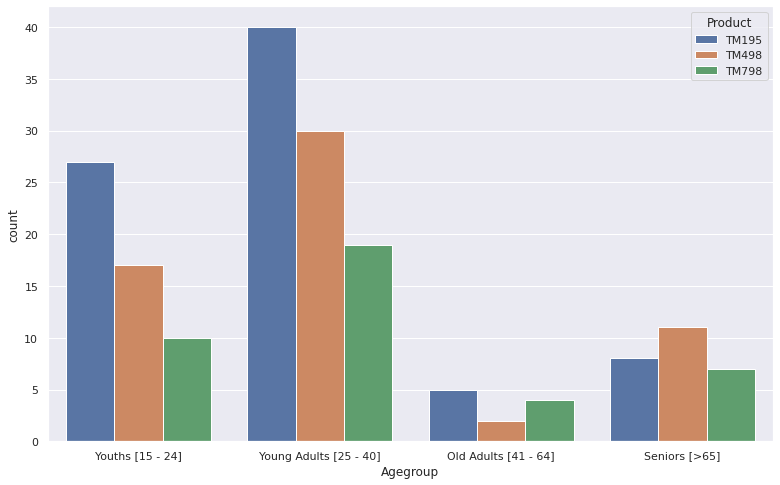

In [23]:
plt.figure(figsize=[13,8])

# Count plot for the Age Group vs Product
sns.countplot(data = cardio, x='Agegroup', 
              order = cardio[['Agegroup', 'Agesort']].sort_values(by = 'Agesort').Agegroup.unique(),  
              hue="Product")

Observation: 
* The age group variation with product is different for ages greater than 40.
* A large chunk of the most popular product was patronised by customers between ages 18 - 40 i.e the Youths and Young adults


### Age vs Education on Bivariate Analysis

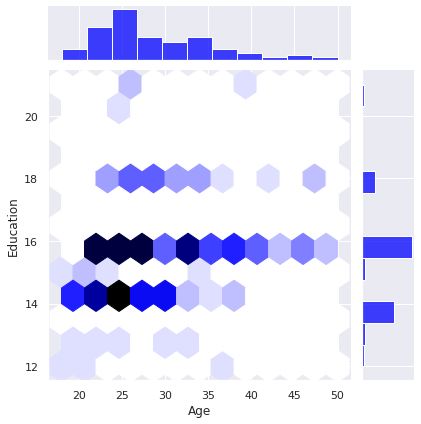

In [24]:
#Bivariate Analysis Age & Education
sns.jointplot(x = 'Age',y = 'Education',data = cardio,color="blue",kind='hex')

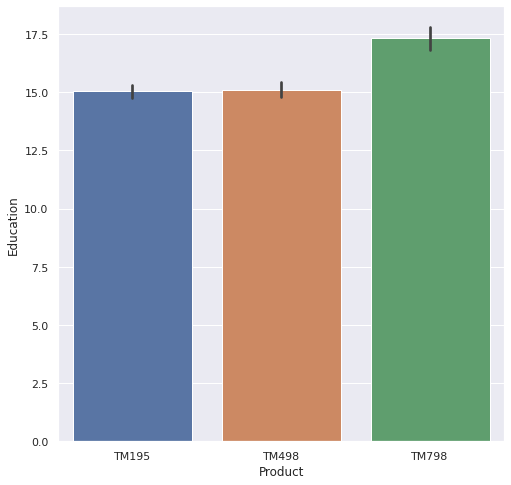

In [25]:
# Barplot of Product with Average Education

plt.figure(figsize = [8,8])
sns.barplot(data=cardio, x="Product", y="Education")

Observation: Customer between age 20-40 have 14 -16 years of education

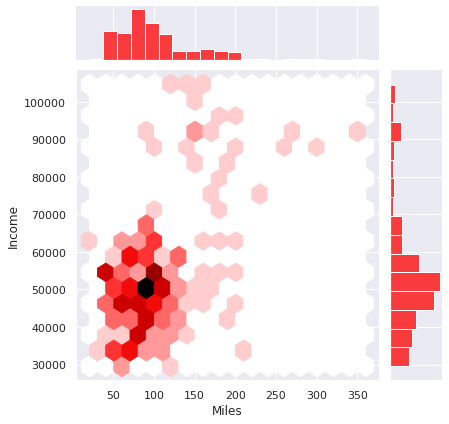

In [26]:
#Bivariate Analysis Income and Miles
sns.jointplot(x = 'Miles',y = 'Income',data = cardio,color="red",kind='hex')

**Observation**: Majority of Customers who are in the income range of \$30k to \$60k prefer to run between 50 - 100 miles

### Further evaluation of Income and Miles per product

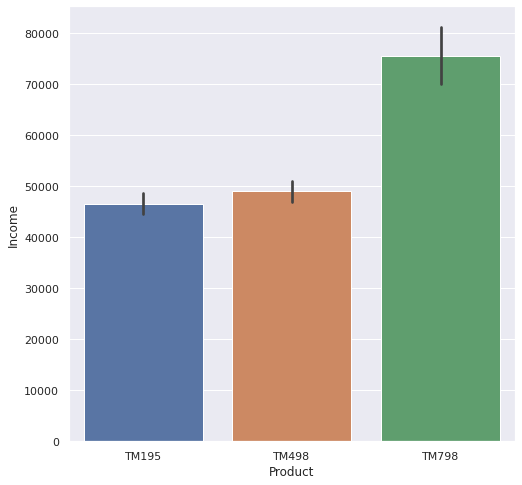

In [27]:
# Barplot of Product with Average Income

plt.figure(figsize = [8,8])
sns.barplot(data=cardio, x="Product", y="Income")

Observation:
* The average income of customers who use the Products TM195 and TM498 fall within the Modal Income range
* The average Income range of TM798 falls within the outliers of the Income range which proves that it is used by the minority

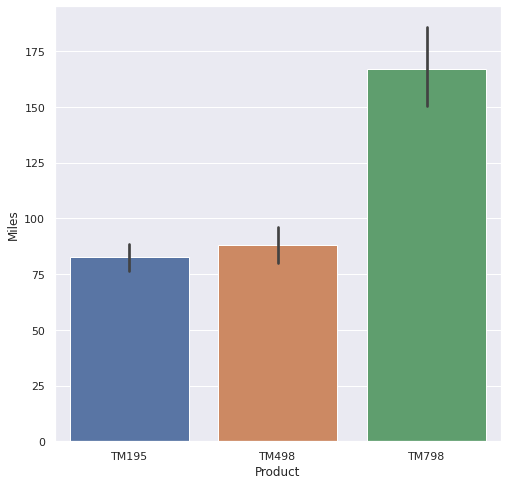

In [28]:
# Barplot of Product with Average Miles

plt.figure(figsize = [8,8])
sns.barplot(data=cardio, x="Product", y="Miles")

Observation:
* The average Miles of customers who use the Products TM195 and TM498 fall within the Modal Miles range
* The average Miles range of TM798 falls within the outliers of the Miles range which proves that it is used by the minority

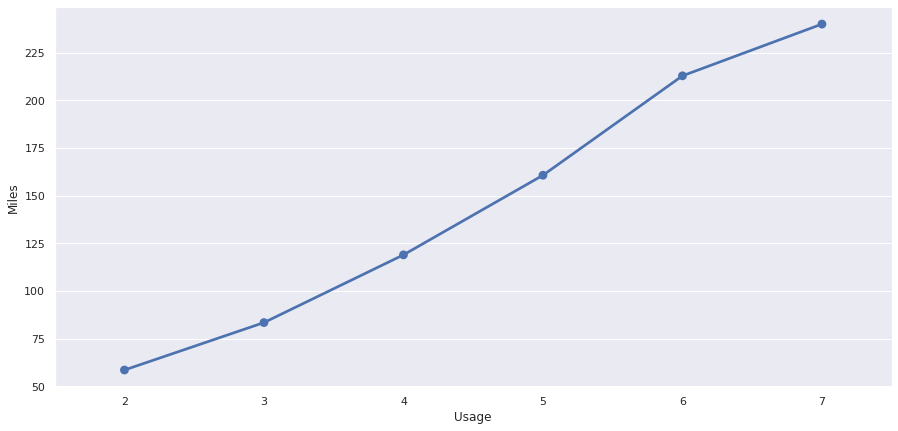

In [29]:
# Point Plot of Usage with Average Miles to see vaiation of usage

plt.figure(figsize=(15, 7))
sns.pointplot(x='Usage', y='Miles', data=cardio, ci=None)

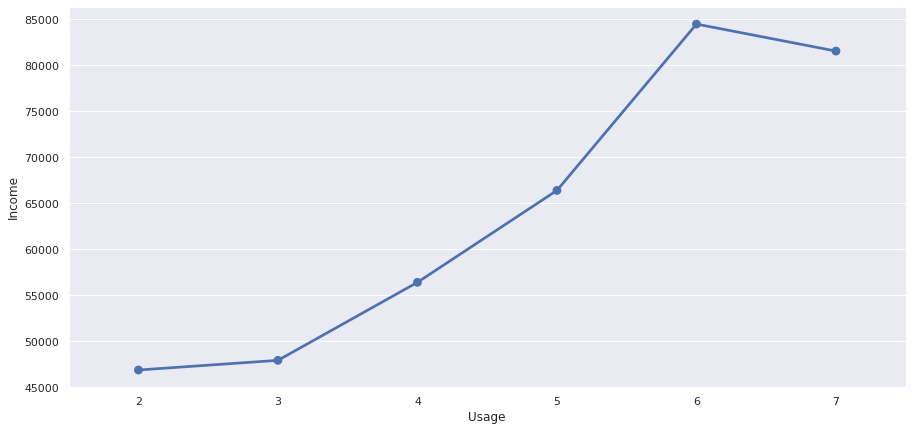

In [30]:
# Point Plot of Usage with Average Income to see vaiation of usage

plt.figure(figsize=(15, 7))
sns.pointplot(x='Usage', y='Income', data=cardio, ci=None)

Observation:
* The Average Miles increases by the Usage which signifies that people who have higher miles invest more time per week
* The Average Income increases by the Usage which signifies that higher income people tend to use the products more per week
* There is a positive correlation between Usage with Income and Miles

### Understanding of Fitness by Average Miles and Income

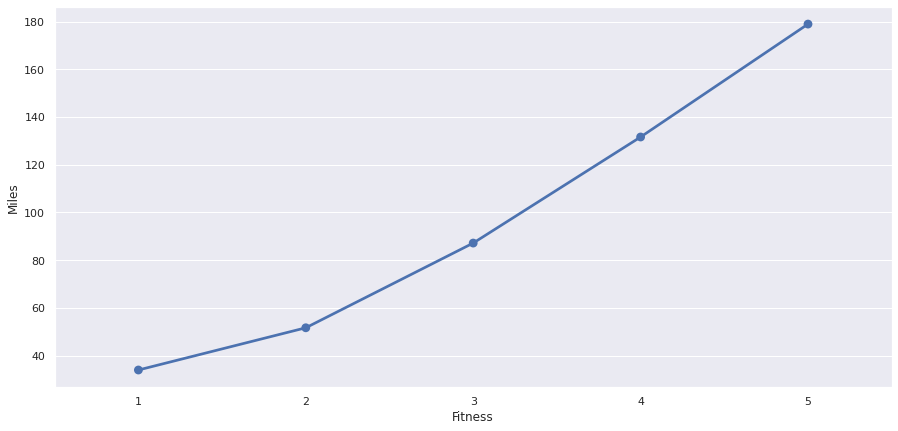

In [31]:
# Point Plot of Fitness with Average Miles to see vaiation of Fitness

plt.figure(figsize=(15, 7))
sns.pointplot(x='Fitness', y='Miles', data=cardio, ci=None)

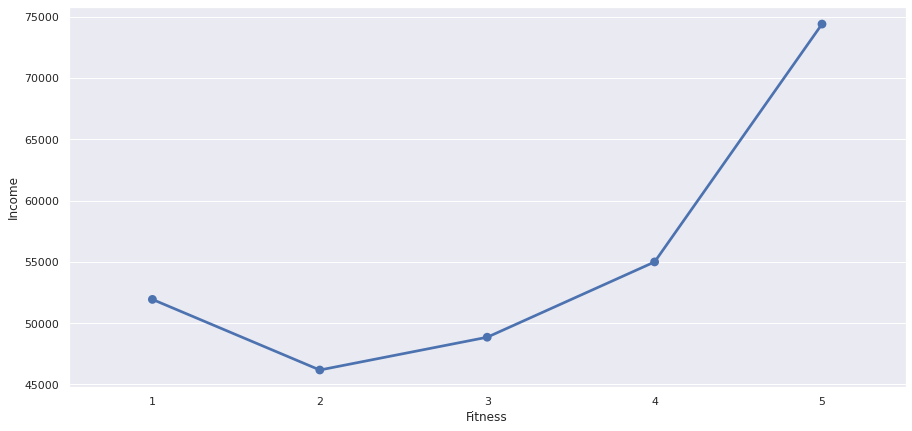

In [32]:
# Point Plot of Fitness with Average Income to see vaiation of Fitness

plt.figure(figsize=(15, 7))
sns.pointplot(x='Fitness', y='Income', data=cardio, ci=None)

Observations:
* People who are very fit have higher income and More miles
* People who have a low fitness lesser income and More miles
* There is a positive correlation between Fitness with Income and Miles

## General Observations

There are three products (TM195, TM498, and TM798) that are offered by Cardio Good Fitness. However, each product has unique Characteristics

### TM195
* This is the mostly purchased product overall
* There is no significant difference in the Amount purchased by Males or females
* Most of the customers have Partners
* This product is most preferred for usage between 2 - 4 times per week
* Similarly, the product has the lowest average number of Miles 
* This product has majority of customers with average fitness
* This product is a favorite from young people between Ages 18 - 40
* This product is preferred by low income people

### TM798
* This is the least purchased product overall
* Most of the customers are males
* Most of the customers have Partners
* This product is most preferred for usage between 4 - 7 times per week
* Similarly, the product has the highest average number of Miles 
* This product has majority of customers who are very fit
* This product is a favorite from young people between Ages 18 - 40
* This product is preferred by High income people

### TM498
* This product is like a balance between the extremes of TM195 and TM798
* However, it is more similar to TM195


## Conclusion and Recommendation

### Conclusion
* Age did not significantly influence the chpices for the Products
* Income, Usage and Miles significantly affected the choices of the Products
* TM195 is a popular product targeted by majority of the customers
* TM795 is a premium product that is targeted by the high class and well educated
* TM498 is more similar to TM195 than TM798
* In grading the different products, **Grade 1 - TM195, Grade 2 - TM498 and Grade 3 - TM798 where Grade 1 is the lowest Grade**

### Recommendation
* Cardio Good Fitness should spend quality time and resources engaging in Social Media campaign specifically targeted at the younger population especially for **Grade 1 and 2 Products**
* To increase the volume of Sales, promotional offers should be added for Grade 1 and 2 products as they tend to be more attractive to people with lower income
* For TM798, Cardio should focus more on current customer satisfaction in order to increase recommendation and prevent churning. This should include support, periodic health meetings, extra health benefits, podcasts etc.
* Cardio FItness should target events where the high class congregate to advertise TM798 and other casual for the remaining products
* TM798 should be made more appealing to potential high class customers through eg. Product customisations, Express Delivery etc.
* There is a significant interest from Seniors (Age 65+). In order to secure a larger base, places like nursing homes can be targeted where most seniors reside. It is rcpmmended that the seniors use TM798 at a more affordable rate.
* Since Product TM195 is preferred for short usage and low income earners, Cardio Fitness can consider starting a fitness center. Through this, people can conveniently use this product without making a permanent purchase commitment.

